# **Set up Kaggle credentials and permissions**

In [3]:
# Make a kaggle directory and move the JSON there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# **Download the dataset from Kaggle**

In [4]:
# Download the thyroid dataset
!kaggle datasets download -d yasserhessein/thyroid-disease-data-set

# Unzip the dataset
!unzip thyroid-disease-data-set.zip

Dataset URL: https://www.kaggle.com/datasets/yasserhessein/thyroid-disease-data-set
License(s): CC-BY-NC-SA-4.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 266MB/s]
Archive:  thyroid-disease-data-set.zip
  inflating: cleaned_dataset_Thyroid1.csv  
  inflating: hypothyroid/hypothyroid.csv  


# **Load the CSV into pandas**

In [73]:
import pandas as pd

# Replace with the actual file name inside the zip if different
df = pd.read_csv("/content/hypothyroid/hypothyroid.csv")
df.head()


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


# **Preprocessing**

In [74]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [75]:
# Iterate through columns and print count of '?'
for col in df.columns:
    if '?' in df[col].unique():
        count = df[col].value_counts().get('?', 0)
        print(f"Column '{col}' has {count} '?' values.")

Column 'age' has 1 '?' values.
Column 'sex' has 150 '?' values.
Column 'TSH' has 369 '?' values.
Column 'T3' has 769 '?' values.
Column 'TT4' has 231 '?' values.
Column 'T4U' has 387 '?' values.
Column 'FTI' has 385 '?' values.
Column 'TBG' has 3772 '?' values.


In [70]:
df.tbg_measured.unique()

array([0], dtype=int8)

In [76]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop the tbg and tbg_measured columns as they have no variance
df = df.drop(['tbg', 'tbg_measured'], axis=1)

# Replace '?' with the mode for all columns
for col in df.columns:
    if '?' in df[col].unique():
        mode_val = df[col].mode()[0]
        df[col] = df[col].replace('?', mode_val)

# Check for missing values
missing = df.isnull().sum()

# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

# Encode categorical and boolean columns
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = df[col].astype('category').cat.codes

In [77]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,referral_source,binaryclass
0,34,0,0,0,0,0,0,0,0,0,...,1,27,1,28,1,72,1,10,1,1
1,15,0,0,0,0,0,0,0,0,0,...,1,22,1,3,0,146,0,234,4,1
2,40,1,0,0,0,0,0,0,0,0,...,0,69,1,10,1,48,1,22,4,1
3,67,0,1,0,0,0,0,0,0,0,...,1,20,1,83,0,146,0,234,4,1
4,67,0,0,0,0,0,0,0,0,0,...,1,12,1,201,1,44,1,199,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,22,0,0,0,0,0,0,0,0,0,...,0,69,0,241,0,146,0,234,4,1
3768,64,0,0,0,0,0,0,0,0,0,...,1,23,1,27,1,66,1,16,3,1
3769,71,0,0,0,0,0,0,0,0,0,...,1,19,1,14,1,65,1,6,4,1
3770,69,1,0,0,0,0,0,0,0,0,...,1,22,1,222,1,51,1,219,3,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3772 non-null   int8 
 1   sex                        3772 non-null   int8 
 2   on_thyroxine               3772 non-null   int8 
 3   query_on_thyroxine         3772 non-null   int8 
 4   on_antithyroid_medication  3772 non-null   int8 
 5   sick                       3772 non-null   int8 
 6   pregnant                   3772 non-null   int8 
 7   thyroid_surgery            3772 non-null   int8 
 8   i131_treatment             3772 non-null   int8 
 9   query_hypothyroid          3772 non-null   int8 
 10  query_hyperthyroid         3772 non-null   int8 
 11  lithium                    3772 non-null   int8 
 12  goitre                     3772 non-null   int8 
 13  tumor                      3772 non-null   int8 
 14  hypopituitary           

In [79]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,referral_source,binaryclass
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,46.343584,0.302757,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.796129,31.103659,0.938759,121.097296,0.897402,66.144486,0.897932,110.733563,3.279427,0.922853
std,20.830367,0.459512,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.402927,20.646771,0.239803,98.638463,0.303473,32.692626,0.302778,97.524103,1.092085,0.266861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,18.000000,1.000000,23.000000,1.000000,46.000000,1.000000,17.000000,3.000000,1.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,24.000000,1.000000,85.000000,1.000000,58.000000,1.000000,58.000000,4.000000,1.000000
75%,63.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,34.000000,1.000000,226.000000,1.000000,72.000000,1.000000,224.000000,4.000000,1.000000
max,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,69.000000,1.000000,241.000000,1.000000,146.000000,1.000000,234.000000,4.000000,1.000000


In [80]:
# Count missing values for each column
missing_values_count = df.isnull().sum()


In [81]:
missing_values_count

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
i131_treatment,0
query_hypothyroid,0


# **Exploratry Data Analysis**

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-945708703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='binaryclass', data=df, palette='Set2')


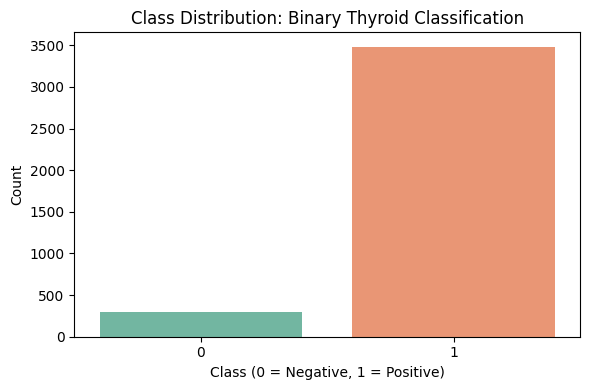

In [64]:
# Class distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x='binaryclass', data=df, palette='Set2')
plt.title("Class Distribution: Binary Thyroid Classification")
plt.xlabel("Class (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

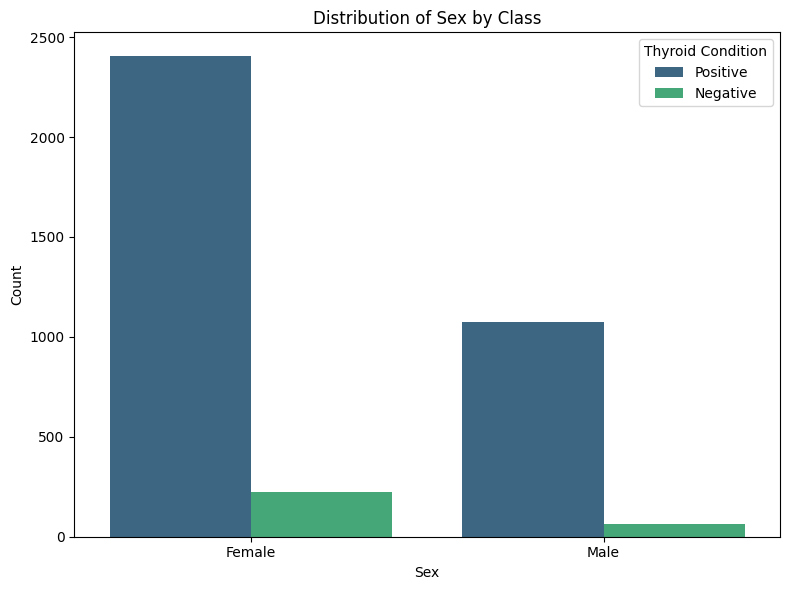

In [65]:
# Plot distribution of 'sex' by 'binaryclass'
plt.figure(figsize=(8, 6))

# Map numerical sex labels to 'Female' and 'Male'
sex_labels = {0: 'Female', 1: 'Male'}
df['sex_labeled'] = df['sex'].map(sex_labels)

# Map numerical binaryclass labels to 'Negative' and 'Positive'
class_labels = {0: 'Negative', 1: 'Positive'}
df['binaryclass_labeled'] = df['binaryclass'].map(class_labels)

sns.countplot(x='sex_labeled', hue='binaryclass_labeled', data=df, palette='viridis')

plt.title('Distribution of Sex by Class')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Thyroid Condition')
plt.tight_layout()
plt.show()

# Drop the temporary labeled columns
df = df.drop(['sex_labeled', 'binaryclass_labeled'], axis=1)

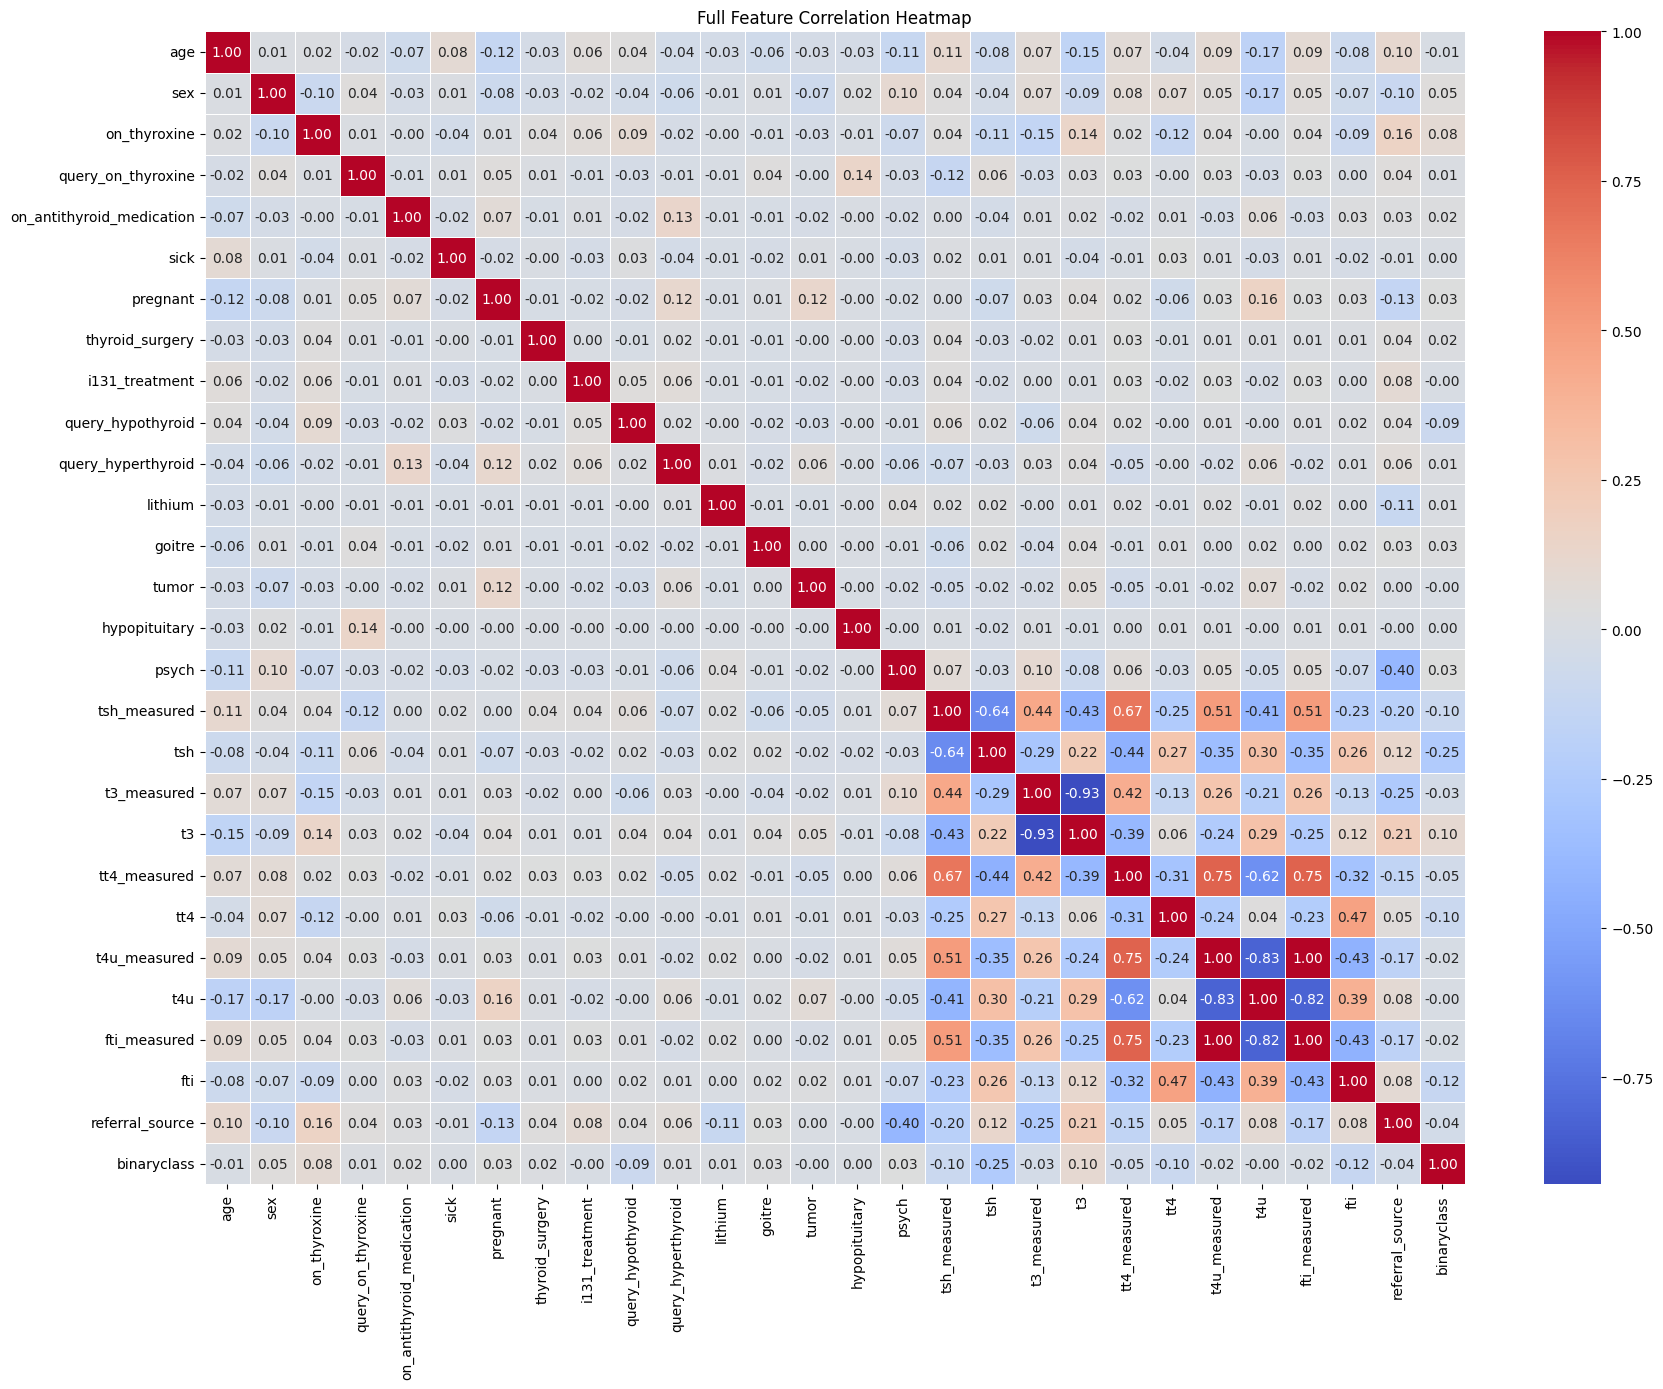

In [83]:
# Correlation heatmap for top features
plt.figure(figsize=(18, 14))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Full Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# **Model Develompent**

## **Import Libraries**

In [84]:
#  Basic imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

#  ML models and utilities
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

#  Handling class imbalance
from imblearn.over_sampling import SMOTE


## **Data Split**

In [85]:
# Separate features and target
X = df.drop('binaryclass', axis=1)
y = df['binaryclass']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


## **Train & Evaluate Base Models**

Training and evaluating base models...

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.86      0.36      0.50        87
           1       0.95      1.00      0.97      1045

    accuracy                           0.95      1132
   macro avg       0.91      0.68      0.74      1132
weighted avg       0.94      0.95      0.94      1132



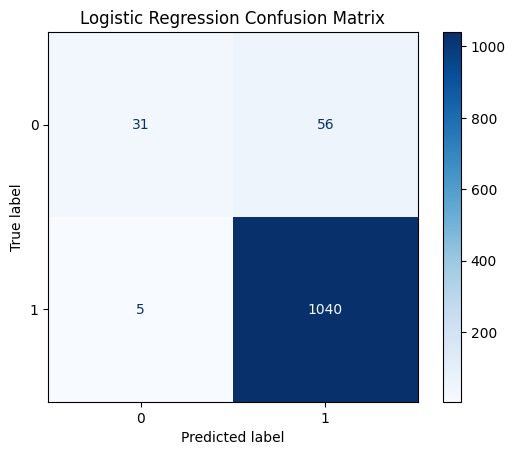


--- SVM ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.92      1.00      0.96      1045

    accuracy                           0.92      1132
   macro avg       0.46      0.50      0.48      1132
weighted avg       0.85      0.92      0.89      1132



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


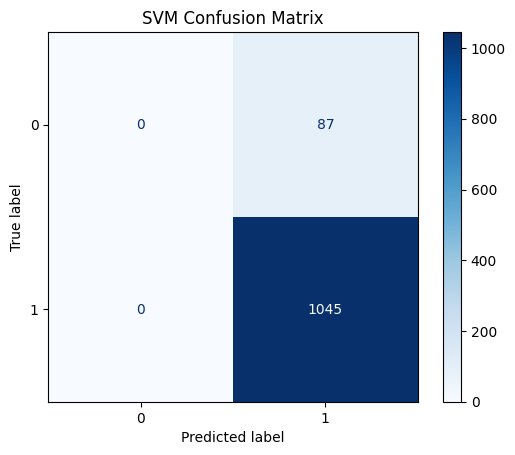


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        87
           1       0.97      0.99      0.98      1045

    accuracy                           0.97      1132
   macro avg       0.93      0.83      0.87      1132
weighted avg       0.97      0.97      0.97      1132



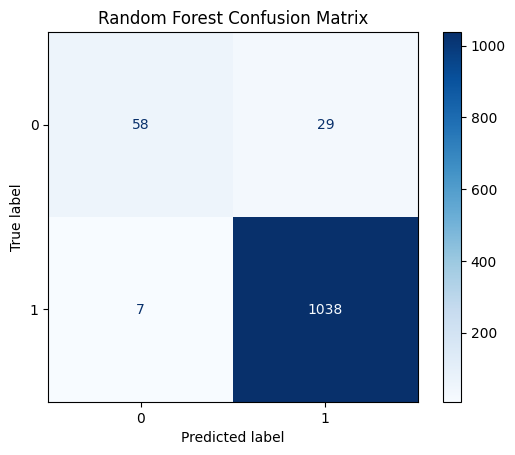


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        87
           1       0.99      1.00      0.99      1045

    accuracy                           0.99      1132
   macro avg       0.97      0.95      0.96      1132
weighted avg       0.99      0.99      0.99      1132



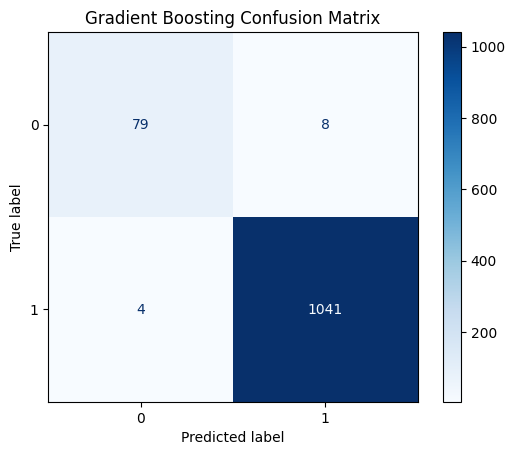

In [86]:
#  Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

print("Training and evaluating base models...")
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    start = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start

    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # ROC/AUC
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
    else:
        fpr, tpr, roc_auc = None, None, None

    results[name] = {
        'model': model,
        'report': report,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'train_time': train_time,
        'predict_time': predict_time
    }

    print(f"\n--- {name} ---")
    print(report)
    ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()


## **Plot ROC Curve for All Models**

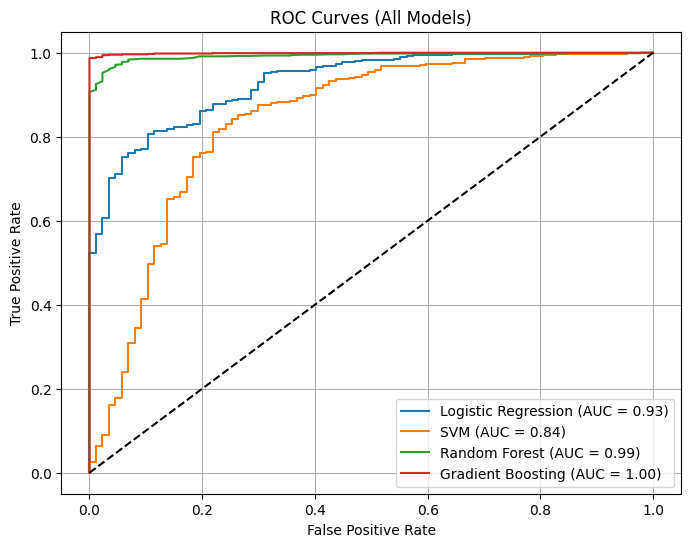

In [87]:
#  Plot ROC curves
plt.figure(figsize=(8, 6))
for name, res in results.items():
    if res['fpr'] is not None:
        plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC = {res['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (All Models)")
plt.legend()
plt.grid(True)
plt.show()


## **Feature Selection Using Random Forest**

In [88]:
# Use RF to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top N
top_n = 20
top_features = importances.head(top_n).index.tolist()
print("Top features:", top_features)

X_sel = X[top_features]


Top features: ['tsh', 't3', 'fti', 'tt4', 'age', 't4u', 'tsh_measured', 'referral_source', 'on_thyroxine', 'sex', 'query_hypothyroid', 't3_measured', 'thyroid_surgery', 'query_hyperthyroid', 'sick', 'tumor', 'i131_treatment', 'fti_measured', 'tt4_measured', 'psych']


In [89]:
y.shape

(3772,)

In [90]:

#  Train-test split
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_sel, y, test_size=0.3, stratify=y, random_state=42)


⏱️ Training with selected features and measuring time...

--- Logistic Regression (Selected Features) ---
Training Time: 0.0337 seconds
Testing Time: 0.0019 seconds
              precision    recall  f1-score   support

           0       0.89      0.36      0.51        87
           1       0.95      1.00      0.97      1045

    accuracy                           0.95      1132
   macro avg       0.92      0.68      0.74      1132
weighted avg       0.94      0.95      0.94      1132



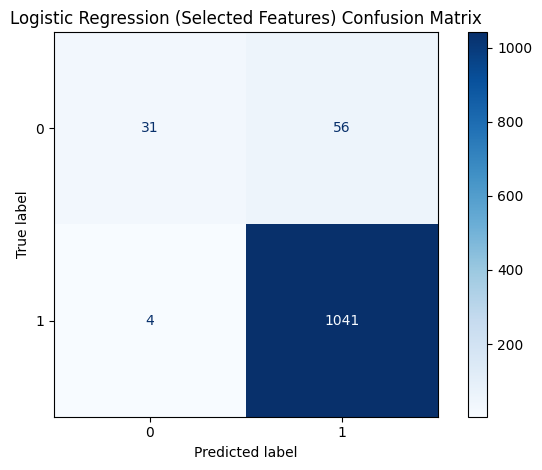

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- SVM (Selected Features) ---
Training Time: 0.3856 seconds
Testing Time: 0.0342 seconds
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.92      1.00      0.96      1045

    accuracy                           0.92      1132
   macro avg       0.46      0.50      0.48      1132
weighted avg       0.85      0.92      0.89      1132



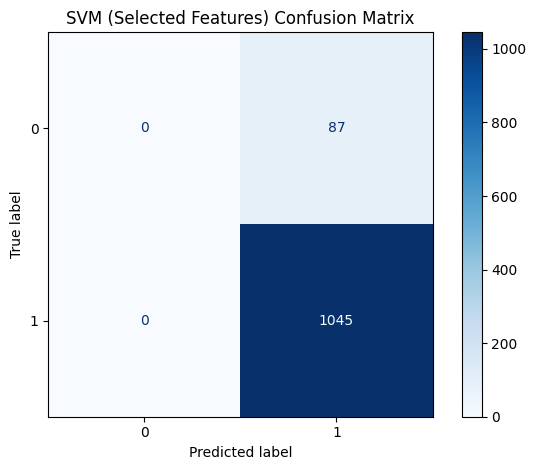


--- Random Forest (Selected Features) ---
Training Time: 0.3659 seconds
Testing Time: 0.0190 seconds
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        87
           1       0.97      0.99      0.98      1045

    accuracy                           0.97      1132
   macro avg       0.94      0.84      0.88      1132
weighted avg       0.97      0.97      0.97      1132



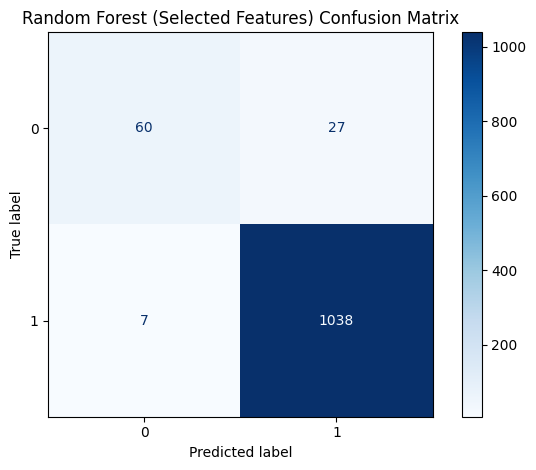


--- Gradient Boosting (Selected Features) ---
Training Time: 0.5470 seconds
Testing Time: 0.0042 seconds
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        87
           1       0.99      1.00      0.99      1045

    accuracy                           0.99      1132
   macro avg       0.97      0.95      0.96      1132
weighted avg       0.99      0.99      0.99      1132



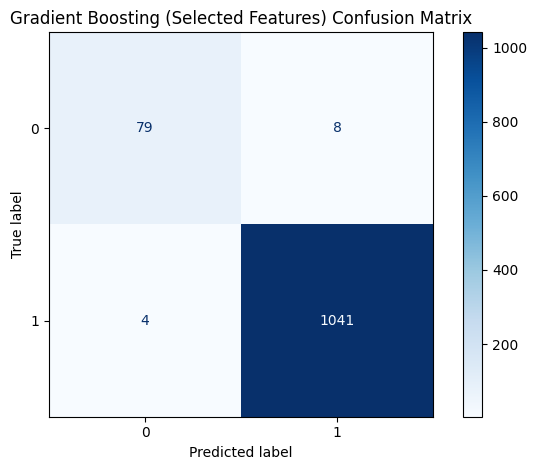

In [91]:
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

results_sel = {}
print("⏱️ Training with selected features and measuring time...")

for name, model in models.items():
    # Measure training time
    start_train = time.time()
    model.fit(X_train_sel, y_train)
    train_duration = time.time() - start_train

    # Measure prediction time
    start_test = time.time()
    y_pred_sel = model.predict(X_test_sel)
    test_duration = time.time() - start_test

    # Evaluation metrics
    report_sel = classification_report(y_test, y_pred_sel)
    cm_sel = confusion_matrix(y_test, y_pred_sel)

    if hasattr(model, 'predict_proba'):
        y_proba_sel = model.predict_proba(X_test_sel)[:, 1]
        fpr_sel, tpr_sel, _ = roc_curve(y_test, y_proba_sel)
        roc_auc_sel = auc(fpr_sel, tpr_sel)
    else:
        fpr_sel, tpr_sel, roc_auc_sel = None, None, None

    results_sel[name] = {
        'report': report_sel,
        'confusion_matrix': cm_sel,
        'fpr': fpr_sel,
        'tpr': tpr_sel,
        'roc_auc': roc_auc_sel,
        'train_time': train_duration,
        'test_time': test_duration
    }

    print(f"\n--- {name} (Selected Features) ---")
    print(f"Training Time: {train_duration:.4f} seconds")
    print(f"Testing Time: {test_duration:.4f} seconds")
    print(report_sel)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_sel, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} (Selected Features) Confusion Matrix")
    plt.tight_layout()
    plt.show()


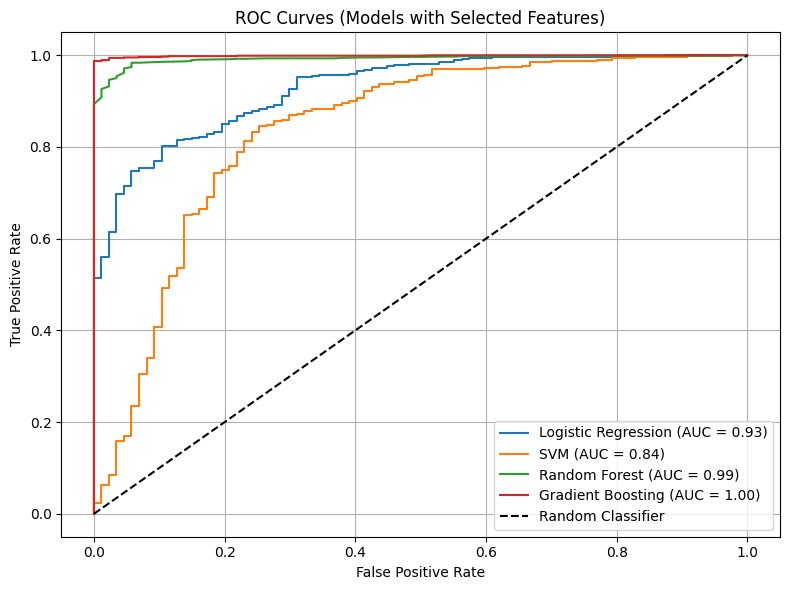

In [92]:
plt.figure(figsize=(8, 6))

for name, res in results_sel.items():
    if res['fpr'] is not None and res['tpr'] is not None:
        plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC = {res['roc_auc']:.2f})")
    else:
        print(f"ROC not available for {name} (no predict_proba method)")

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title("ROC Curves (Models with Selected Features)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Apply SMOTE and Visualize Class Balance**

In [94]:
X_sel.shape

(3772, 20)

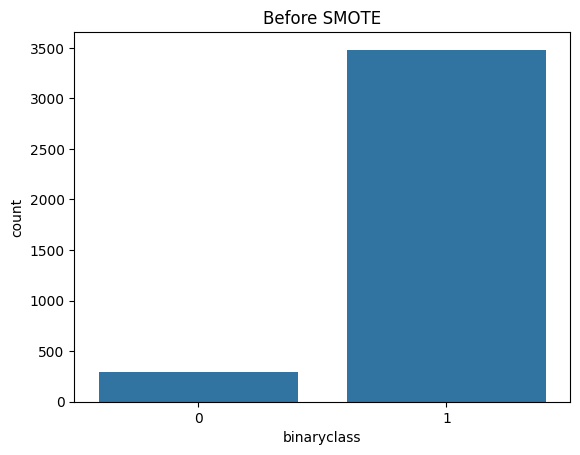

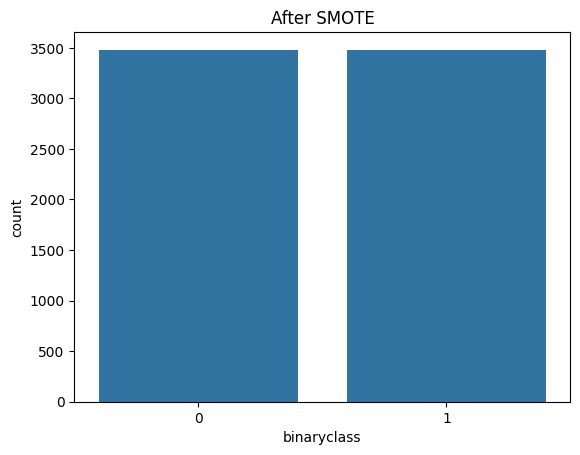

In [95]:
#  Before SMOTE
sns.countplot(x=y)
plt.title("Before SMOTE")
plt.show()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_sel_smote, y_smote = smote.fit_resample(X_sel, y) # Correctly assign resampled target to y_smote

# Convert SMOTE output back to pandas for plotting
X_sel_smote = pd.DataFrame(X_sel_smote, columns=X_sel.columns) # Convert X_sel_smote to DataFrame
y_smote = pd.Series(y_smote, name='binaryclass') # Convert y_smote to Series

# After SMOTE
sns.countplot(x=y_smote) # Use y_smote for plotting
plt.title("After SMOTE")
plt.show()

In [96]:
X_sel_smote.shape

(6962, 20)

In [97]:
y_smote.shape

(6962,)

In [98]:

#  Train-test split
X_train_smote, X_test, y_train_smote, y_test = train_test_split(X_sel_smote, y_smote, test_size=0.3, random_state=42)


## **Train Models on SMOTE Data**

 Training on SMOTE data...

--- Logistic Regression (SMOTE) ---
Training Time: 0.0450 seconds
Prediction Time: 0.0020 seconds
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1032
           1       0.89      0.87      0.88      1057

    accuracy                           0.88      2089
   macro avg       0.88      0.88      0.88      2089
weighted avg       0.88      0.88      0.88      2089



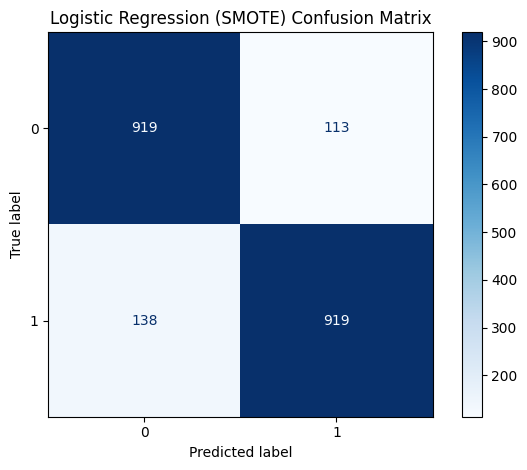


--- SVM (SMOTE) ---
Training Time: 4.8741 seconds
Prediction Time: 0.2888 seconds
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1032
           1       0.84      0.79      0.82      1057

    accuracy                           0.82      2089
   macro avg       0.82      0.82      0.82      2089
weighted avg       0.82      0.82      0.82      2089



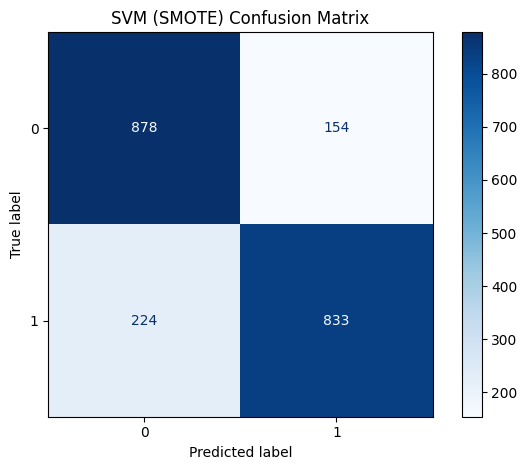


--- Random Forest (SMOTE) ---
Training Time: 1.2314 seconds
Prediction Time: 0.0305 seconds
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1032
           1       0.99      0.97      0.98      1057

    accuracy                           0.98      2089
   macro avg       0.98      0.98      0.98      2089
weighted avg       0.98      0.98      0.98      2089



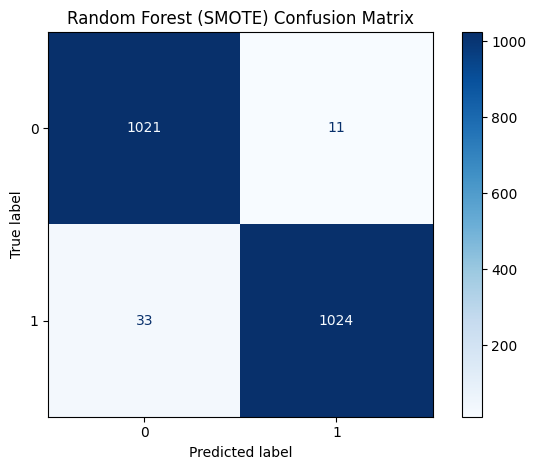


--- Gradient Boosting (SMOTE) ---
Training Time: 0.8188 seconds
Prediction Time: 0.0063 seconds
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1032
           1       0.98      0.97      0.98      1057

    accuracy                           0.98      2089
   macro avg       0.98      0.98      0.98      2089
weighted avg       0.98      0.98      0.98      2089



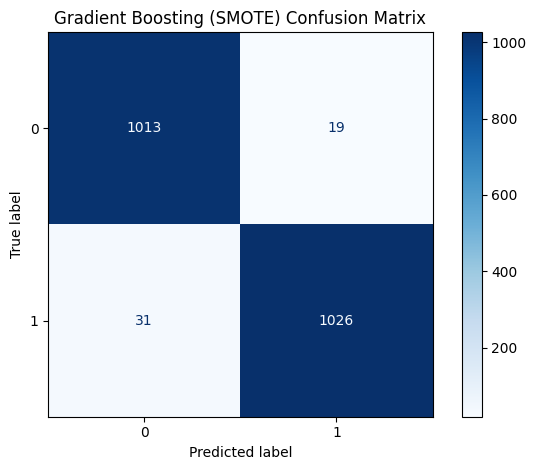

In [99]:
import time
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_curve, auc

results_smote = {}
print(" Training on SMOTE data...")

for name in models:
    if name == "Logistic Regression":
        model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
    elif name == "SVM":
        model = SVC(probability=True, random_state=42)
    elif name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    elif name == "Gradient Boosting":
        model = GradientBoostingClassifier(random_state=42)

    # Measure training time
    start_train = time.time()
    model.fit(X_train_smote, y_train_smote)
    train_time = time.time() - start_train

    # Measure prediction time
    start_pred = time.time()
    y_pred_smote = model.predict(X_test)
    pred_time = time.time() - start_pred

    # Evaluate metrics
    report = classification_report(y_test, y_pred_smote)
    cm = confusion_matrix(y_test, y_pred_smote)

    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
    else:
        fpr, tpr, roc_auc = None, None, None

    results_smote[name] = {
        'model': model,
        'report': report,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'train_time': train_time,
        'predict_time': pred_time
    }

    print(f"\n--- {name} (SMOTE) ---")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Prediction Time: {pred_time:.4f} seconds")
    print(report)

    # Plot Confusion Matrix
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap=plt.cm.Blues)
    plt.title(f"{name} (SMOTE) Confusion Matrix")
    plt.tight_layout()
    plt.show()


## **ROC Curve for SMOTE Models**

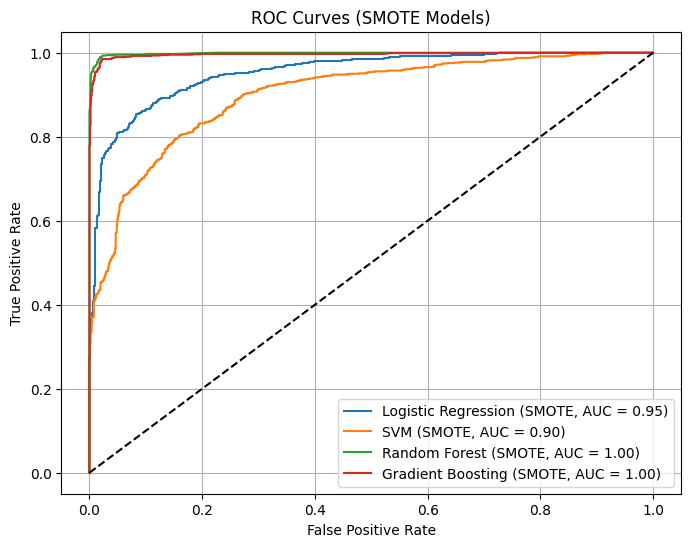

In [100]:
plt.figure(figsize=(8, 6))
for name, res in results_smote.items():
    if res['fpr'] is not None:
        plt.plot(res['fpr'], res['tpr'], label=f"{name} (SMOTE, AUC = {res['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (SMOTE Models)")
plt.legend()
plt.grid(True)
plt.show()
